In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as plot
import seaborn as sns
import os

# Skip Warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action = 'ignore', category = DeprecationWarning)
warnings.filterwarnings(action = 'ignore', category = FutureWarning)

In [2]:
train = pd.read_csv('train.csv', index_col=0)
test = pd.read_csv('test.csv',index_col=0)
train.shape

(1460, 80)

By default, Pandas displays only _first 10_ and _last 10_ features  

Since our dataset has 81 features, we need to see all the 81 features to perform EDA. This can be done using `pd.set_option`

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [4]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       '

In [6]:
train.describe(include='all')

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460,1460,1460,1452,1452.000000,1460,1460,1460,1423,1423,1422,1423,1460.000000,1422,1460.000000,1460.000000,1460.000000,1460,1460,1460,1459,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460.000000,1460,1460.000000,770,1379,1379.000000,1379,1460.000000,1460.000000,1379,1379,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,5,NaN,NaN,2,2,4,4,2,5,3,25,9,8,5,8,NaN,NaN,NaN,NaN,6,8,15,16,4,NaN,4,5,6,4,4,4,6,NaN,6,NaN,NaN,NaN,6,5,2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,7,NaN,5,6,NaN,3,NaN,NaN,5,5,3,NaN,NaN,NaN,NaN,NaN,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,NaN,NaN,NaN,NaN,Gable,CompShg,VinylSd,VinylSd,None,NaN,TA,TA,PConc,TA,TA,No,Unf,NaN,Unf,NaN,NaN,NaN,GasA,Ex,Y,SBrkr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TA,NaN,Typ,NaN,Gd,Attchd,NaN,Unf,NaN,NaN,TA,TA,Y,NaN,NaN,NaN,NaN,NaN,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,1151,NaN,NaN,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,NaN,NaN,NaN,NaN,1141,1434,515,504,864,NaN,906,1282,647,649,1311,953,430,NaN,1256,NaN,NaN,NaN,1428,741,1365,1334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,735,NaN,1360,NaN,380,870,NaN,605,NaN,NaN,1311,1326,1340,NaN,NaN,NaN,NaN,NaN,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.099315,5.575342,1971.267808,1984.865753,NaN,NaN,NaN,NaN,NaN,103.685262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,443.639726,NaN,46.549315,567.240411,1057.429452,NaN,NaN,NaN,NaN,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,NaN,6.517808,NaN,0.613014,NaN,NaN,1978.506164,NaN,1.767123,472.980137,NaN,NaN,NaN,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.382997,1.112799,30.202904,20.645407,NaN,NaN,NaN,NaN,NaN,181.066207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,456.098091,NaN,161.319273,441.866955,438.705324,NaN,NaN,NaN,NaN,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,NaN,1.625393,NaN,0.644666,NaN,NaN,24.689725,NaN,0.747315,213.804841,NaN,NaN,NaN,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1872.000000,1950.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2.000000,NaN,0.000000,NaN,NaN,1900.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,

In [7]:
cat_cols = ['MSSubClass','MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig','LandSlope', 
            'Neighborhood','Condition1', 'Condition2', 'BldgType', 'HouseStyle','OverallQual','OverallCond', 'YearBuilt',
            'YearRemodAdd','RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual','ExterCond', 
            'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','Heating', 'HeatingQC',
            'CentralAir', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath','BedroomAbvGr',
            'KitchenAbvGr', 'KitchenQual','TotRmsAbvGrd','Functional','Fireplaces','FireplaceQu', 
            'GarageType','GarageYrBlt', 'GarageFinish','GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', 
            'PoolQC', 'Fence', 'MiscFeature','MoSold','YrSold', 'SaleType', 'SaleCondition']

In [8]:
num_cols = ['LotFrontage', 'LotArea','MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', 
            '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 
            'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal','SalePrice']

# # To remove the target variable
# del num_cols[-1]

In [9]:
num_cols

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'SalePrice']

In [10]:
for x in cat_cols :
    print(x, '----->>', train[x].unique(), '\n')

MSSubClass ----->> [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40] 

MSZoning ----->> ['RL' 'RM' 'C (all)' 'FV' 'RH'] 

Street ----->> ['Pave' 'Grvl'] 

Alley ----->> [nan 'Grvl' 'Pave'] 

LotShape ----->> ['Reg' 'IR1' 'IR2' 'IR3'] 

LandContour ----->> ['Lvl' 'Bnk' 'Low' 'HLS'] 

Utilities ----->> ['AllPub' 'NoSeWa'] 

LotConfig ----->> ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3'] 

LandSlope ----->> ['Gtl' 'Mod' 'Sev'] 

Neighborhood ----->> ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste'] 

Condition1 ----->> ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe'] 

Condition2 ----->> ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe'] 

BldgType ----->> ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs'] 

HouseStyle ----->> ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SF

In [11]:
for x in num_cols :
    print(x, '----->>', train[x].nunique(), ' :- ', train[x].unique()[:10], '\n')

LotFrontage ----->> 110  :-  [65. 80. 68. 60. 84. 85. 75. nan 51. 50.] 

LotArea ----->> 1073  :-  [ 8450  9600 11250  9550 14260 14115 10084 10382  6120  7420] 

MasVnrArea ----->> 327  :-  [196.   0. 162. 350. 186. 240. 286. 306. 212. 180.] 

BsmtFinSF1 ----->> 637  :-  [ 706  978  486  216  655  732 1369  859    0  851] 

BsmtFinSF2 ----->> 144  :-  [  0  32 668 486  93 491 506 712 362  41] 

BsmtUnfSF ----->> 780  :-  [150 284 434 540 490  64 317 216 952 140] 

TotalBsmtSF ----->> 721  :-  [ 856 1262  920  756 1145  796 1686 1107  952  991] 

1stFlrSF ----->> 753  :-  [ 856 1262  920  961 1145  796 1694 1107 1022 1077] 

2ndFlrSF ----->> 417  :-  [ 854    0  866  756 1053  566  983  752 1142 1218] 

LowQualFinSF ----->> 24  :-  [  0 360 513 234 528 572 144 392 371 390] 

GrLivArea ----->> 861  :-  [1710 1262 1786 1717 2198 1362 1694 2090 1774 1077] 

GarageArea ----->> 441  :-  [548 460 608 642 836 480 636 484 468 205] 

WoodDeckSF ----->> 274  :-  [  0 298 192  40 255 235  90 147 

In [12]:
cat_none_cols = ['Alley','MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
                 'Electrical','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond',
                 'PoolQC','Fence','MiscFeature']

for col in cat_none_cols:
    train[col] = train[col].fillna('None')

<div class="alert alert-block alert-info"><b> 

 - From the above `num_cols` information, we can add 1 new column named `TotalSF` which is the total house square feet of the house using `TotalBsmtSF` `1stFlrSF` and `2ndFlrSF`

</b></div>

In [16]:
train['TotalSF'] = train['TotalBsmtSF'] + train['1stFlrSF'] + train['2ndFlrSF']
num_cols.append('TotalSF')

In [17]:
train.shape

(1460, 81)

In [18]:
num_cols

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'SalePrice',
 'TotalSF',
 'TotalSF']

In [19]:
train[cat_cols].describe(include='all')

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition
count,1460.000000,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460.000000,1460,1460.000000,1460,1460,1379.000000,1460,1460.000000,1460,1460,1460,1460,1460,1460,1460.000000,1460.000000,1460,1460
unique,NaN,5,2,3,4,4,2,5,3,25,9,8,5,8,NaN,NaN,NaN,NaN,6,8,15,16,4,4,5,6,5,5,5,7,7,6,5,2,6,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,7,NaN,6,7,NaN,4,NaN,6,6,3,4,5,5,NaN,NaN,9,6
top,NaN,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,NaN,NaN,NaN,NaN,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,NaN,NaN,NaN,NaN,NaN,NaN,TA,NaN,Typ,NaN,None,Attchd,NaN,Unf,NaN,TA,TA,Y,None,None,None,NaN,NaN,WD,Normal
freq,NaN,1151,1454,1369,925,1311,1459,1052,1382,225,1260,1445,1220,726,NaN,NaN,NaN,NaN,1141,1434,515,504,872,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,NaN,NaN,NaN,NaN,NaN,NaN,735,NaN,1360,NaN,690,870,NaN,605,NaN,1311,1326,1340,1453,1179,1406,NaN,NaN,1267,1198
mean,56.897260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.099315,5.575342,1971.267808,1984.865753,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,NaN,6.517808,NaN,0.613014,NaN,NaN,1978.506164,NaN,1.767123,NaN,NaN,NaN,NaN,NaN,NaN,6.321918,2007.815753,NaN,NaN
std,42.300571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.382997,1.112799,30.202904,20.645407,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,NaN,1.625393,NaN,0.644666,NaN,NaN,24.689725,NaN,0.747315,NaN,NaN,NaN,NaN,NaN,NaN,2.703626,1.328095,NaN,NaN
min,20.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1872.000000,1950.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2.000000,NaN,0.000000,NaN,NaN,1900.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,2006.000000,NaN,NaN
25%,20.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,5.000000,1954.000000,1967.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,NaN,5.000000,NaN,0.000000,NaN,NaN,1961.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,2007.000000,NaN,NaN
50%,50.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,5.000000,1973.000000,1994.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,NaN,6.000000,NaN,1.000000,NaN,NaN,1980.000000,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,2008.000000,NaN,NaN
75%,70.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,6.000000,2000.000000,2004.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,NaN,7.000000,NaN,1.000000,NaN,NaN,2002.000000,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,2009.000000,NaN,NaN


We can see that the column `Alley` has now has three levels instead of 2 levels.

Hence, we have successfully converted the `NaN` to `None`

## Train-Test Split


In [20]:
from sklearn.model_selection import train_test_split

house_train, house_test = train_test_split(train, test_size = 0.3, random_state = 1234)

In [21]:
print("Shape of training set:",house_train.shape)
print("Shape of validation set:",house_test.shape)

Shape of training set: (1022, 81)
Shape of validation set: (438, 81)


### Checking for NaN values

In [22]:
missing_values = house_train.isna().sum()

missing_values = missing_values[missing_values>0]
missing_values.sort_values(inplace=True)

In [23]:
miss_data = pd.DataFrame(missing_values, columns = ['Count of missing data'])
miss_data['Percentage of Null Values'] = pd.DataFrame(miss_data['Count of missing data']/len(train)*100)

miss_data

,Count of missing data,Percentage of Null Values
MasVnrArea,6,0.410959
GarageYrBlt,52,3.561644
LotFrontage,181,12.397260


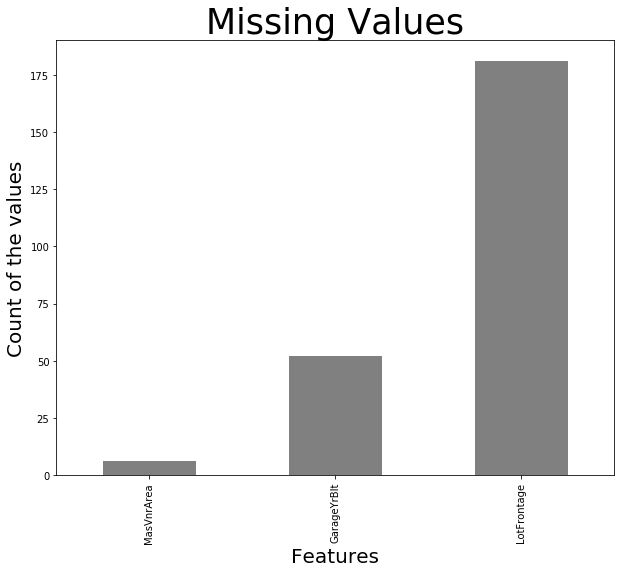

In [24]:
miss_data['Count of missing data'].plot(kind='bar',figsize=(10,8), color='#808080')
plt.xlabel('Features',fontsize=20)
plt.ylabel('Count of the values', fontsize=20)
plt.title('Missing Values', fontsize=35)
plt.show()

We can see that less than 20% of the data has `NaN` values. Hence, no need to drop any of these features. 

### We will take care of them in _Imputation_

## Imputation 

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

num_imputer = SimpleImputer(strategy = 'median')
house_train[num_cols] = num_imputer.fit_transform(house_train[num_cols])
house_test[num_cols] = num_imputer.transform(house_test[num_cols])

cat_imputer = SimpleImputer(strategy = 'most_frequent')
house_train[cat_cols] = cat_imputer.fit_transform(house_train[cat_cols]) # Imputing "GarageYrBlt" as 81 NaN
house_test[cat_cols] = cat_imputer.transform(house_test[cat_cols])

### `Label Encoding` of the categorical variables

In [26]:
house_train_corr, house_test_corr = house_train.copy(), house_test.copy()

df = pd.concat([house_train_corr, house_test_corr])[cat_cols]

df.head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1018,120,RL,Pave,None,IR1,Lvl,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,None,Gd,TA,CBlock,Gd,TA,Av,GLQ,Unf,GasA,Gd,Y,SBrkr,1,0,1,0,1,1,Gd,4,Typ,1,Ex,Attchd,1984.0,RFn,2,TA,TA,Y,None,None,None,8,2009,COD,Abnorml
406,20,RL,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Sawyer,Feedr,Norm,1Fam,1Story,4,4,1976,1993,Gable,CompShg,Plywood,Plywood,None,TA,TA,CBlock,TA,TA,No,BLQ,Unf,GasA,Ex,Y,SBrkr,1,0,2,0,3,1,TA,8,Min1,1,TA,Attchd,1993.0,Unf,2,TA,TA,Y,None,GdWo,None,6,2009,WD,Normal
7,20,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,Gd,TA,PConc,Ex,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,TA,TA,Y,None,None,None,8,2007,WD,Normal
389,20,RL,Pave,None,IR1,Lvl,AllPub,CulDSac,Gtl,CollgCr,Norm,Norm,1Fam,1Story,7,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,0,0,2,0,3,1,Gd,6,Typ,0,None,Attchd,1999.0,RFn,2,TA,TA,Y,None,None,None,7,2008,WD,Normal
502,60,FV,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,7,5,2005,2005,Gable,CompShg,VinylSd,VinylSd,None,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Gd,Y,SBrkr,0,0,2,1,3,1,Gd,7,Typ,0,None,Attchd,2005.0,RFn,2,TA,TA,Y,None,None,None,2,2008,WD,Normal


In [27]:
from sklearn.preprocessing import LabelEncoder # Converts cat data to numeric
from collections import defaultdict

encoder = defaultdict(LabelEncoder)

# Encoding the categorical features on full data
cat_encoder = df.apply(lambda x: encoder[x.name].fit_transform(x))

# Transfrom the train & test splits
house_train_corr[cat_cols] = house_train_corr[cat_cols].apply(lambda x: encoder[x.name].transform(x))
house_test_corr[cat_cols] = house_test_corr[cat_cols].apply(lambda x: encoder[x.name].transform(x))


In [28]:
house_train_corr[num_cols].head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,TotalSF,TotalSF
Id,,,,,,,,,,,,,,,,,,,,,,
1018,69.0,5814.0,0.0,1036.0,0.0,184.0,1220.0,1360.0,0.0,0.0,1360.0,565.0,63.0,0.0,0.0,0.0,0.0,0.0,0.0,187500.0,2580.0,2580.0
406,69.0,9991.0,0.0,1116.0,0.0,165.0,1281.0,1620.0,0.0,0.0,1620.0,490.0,120.0,78.0,0.0,0.0,0.0,0.0,0.0,150000.0,2901.0,2901.0
7,75.0,10084.0,186.0,1369.0,0.0,317.0,1686.0,1694.0,0.0,0.0,1694.0,636.0,255.0,57.0,0.0,0.0,0.0,0.0,0.0,307000.0,3380.0,3380.0
389,93.0,9382.0,125.0,0.0,0.0,1468.0,1468.0,1479.0,0.0,0.0,1479.0,577.0,120.0,25.0,0.0,0.0,0.0,0.0,0.0,191000.0,2947.0,2947.0
502,75.0,9803.0,0.0,400.0,0.0,466.0,866.0,866.0,902.0,0.0,1768.0,603.0,0.0,108.0,0.0,0.0,0.0,0.0,0.0,226700.0,2634.0,2634.0


In [29]:
house_train_corr[cat_cols].head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1018,11,3,1,1,0,3,0,1,0,22,2,2,4,2,7,4,85,34,1,1,6,6,2,2,4,1,2,4,0,2,6,1,2,1,5,1,0,1,0,1,1,2,2,6,1,0,1,70,2,2,5,5,2,3,4,1,7,3,0,0
406,0,3,1,1,0,3,0,0,0,19,1,2,0,2,3,3,77,43,1,1,9,10,2,3,4,1,4,4,3,1,6,1,0,1,5,1,0,2,0,3,1,3,6,2,1,5,1,79,3,2,5,5,2,3,1,1,5,3,8,4
7,0,3,1,1,3,3,0,4,0,21,2,2,0,2,7,4,105,55,1,1,12,13,3,2,4,2,0,4,0,2,6,1,0,1,5,1,0,2,0,3,1,2,5,6,1,2,1,90,2,2,5,5,2,3,4,1,7,1,8,4
389,0,3,1,1,0,3,0,1,0,5,2,2,0,2,6,4,100,50,1,1,12,13,1,2,4,2,2,4,3,6,6,1,0,1,5,0,0,2,0,3,1,2,4,6,0,3,1,85,2,2,5,5,2,3,4,1,6,2,8,4
502,5,1,1,1,3,3,0,4,0,21,2,2,0,5,6,4,106,55,1,1,12,13,2,2,4,2,2,4,3,2,6,1,2,1,5,0,0,2,1,3,1,2,5,6,0,3,1,91,2,2,5,5,2,3,4,1,1,2,8,4


In [30]:
house_train[cat_cols].astype('category').describe()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition
count,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022.0,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022
unique,15,5,2,3,4,4,2,5,3,25,9,7,5,8,10,8,110,61,6,7,14,16,4,4,5,6,5,4,5,7,7,6,5,2,4,3,3,4,3,8,4,4,12,7,4,6,7,96.0,4,5,6,6,3,4,5,5,12,5,9,6
top,20,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,2005,1950,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,0,0,2,0,3,1,TA,6,Typ,0,None,Attchd,2005.0,Unf,2,TA,TA,Y,None,None,None,6,2007,WD,Normal
freq,377,803,1016,957,645,917,1021,741,963,157,877,1010,856,504,285,578,49,122,784,1004,359,349,610,633,894,454,455,919,657,295,874,1002,526,963,946,594,969,536,647,571,973,514,276,954,491,491,612,101.0,426,567,916,931,937,1017,827,983,167,235,894,848


# Visualization

In [31]:
def corr_plot(df, size = (20, 15), top = None) :
    
    corrmat = df.corr()

    if top == None :    
        f, ax = plt.subplots(figsize = size)
        sns.heatmap(corrmat, annot = True, fmt = '.2f') # fmt = Decimal rounds
    else :
        cor_cols = corrmat.nlargest(top, 'SalePrice')['SalePrice'].index
        corrmat = np.corrcoef(df[cor_cols].values.T)
        f, ax = plt.subplots(figsize = size)
        sns.heatmap(corrmat, annot = True, fmt = '.2f', 
                    yticklabels = cor_cols.values, xticklabels = cor_cols.values)
        

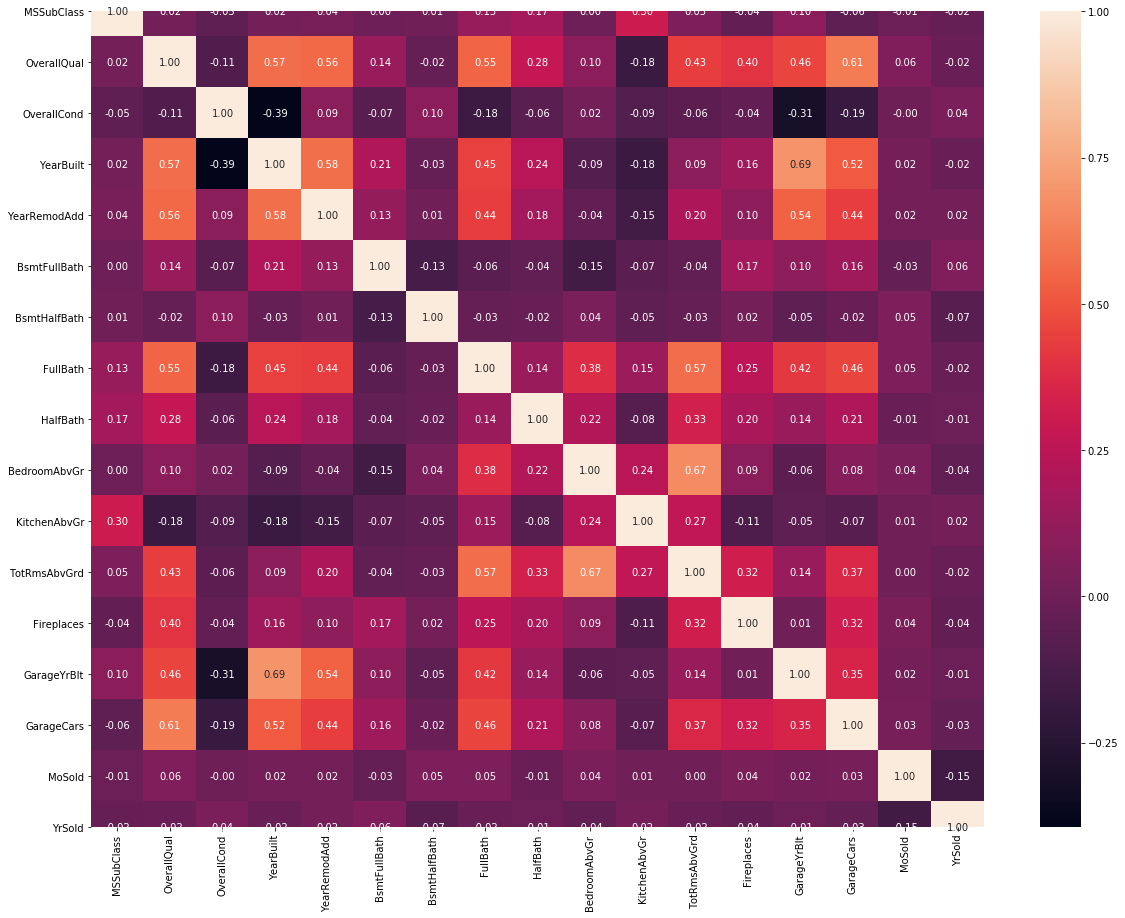

In [32]:
corr_plot(house_train[cat_cols])

### Distribution of the target variable `SalePrice`

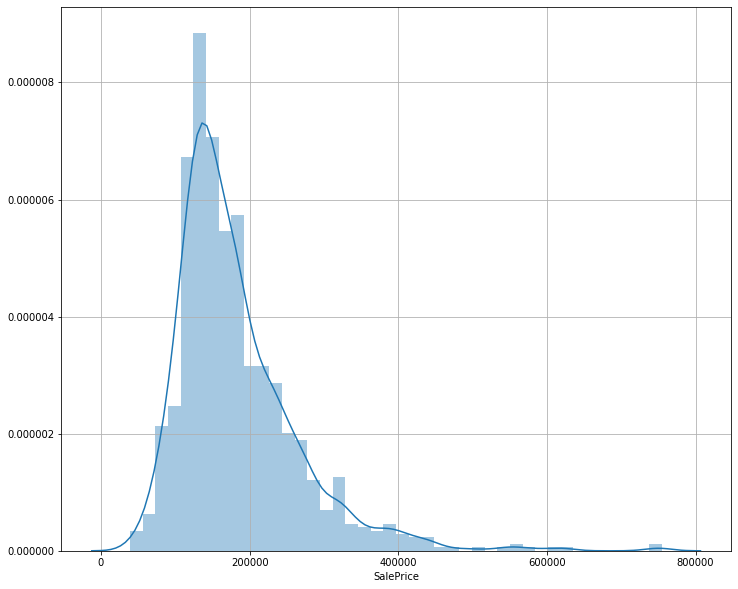

In [33]:
plt.figure(figsize = (12,10))
sns.distplot(a = house_train['SalePrice'])
plt.grid(True)

### Visualization of `Categorical Columns`

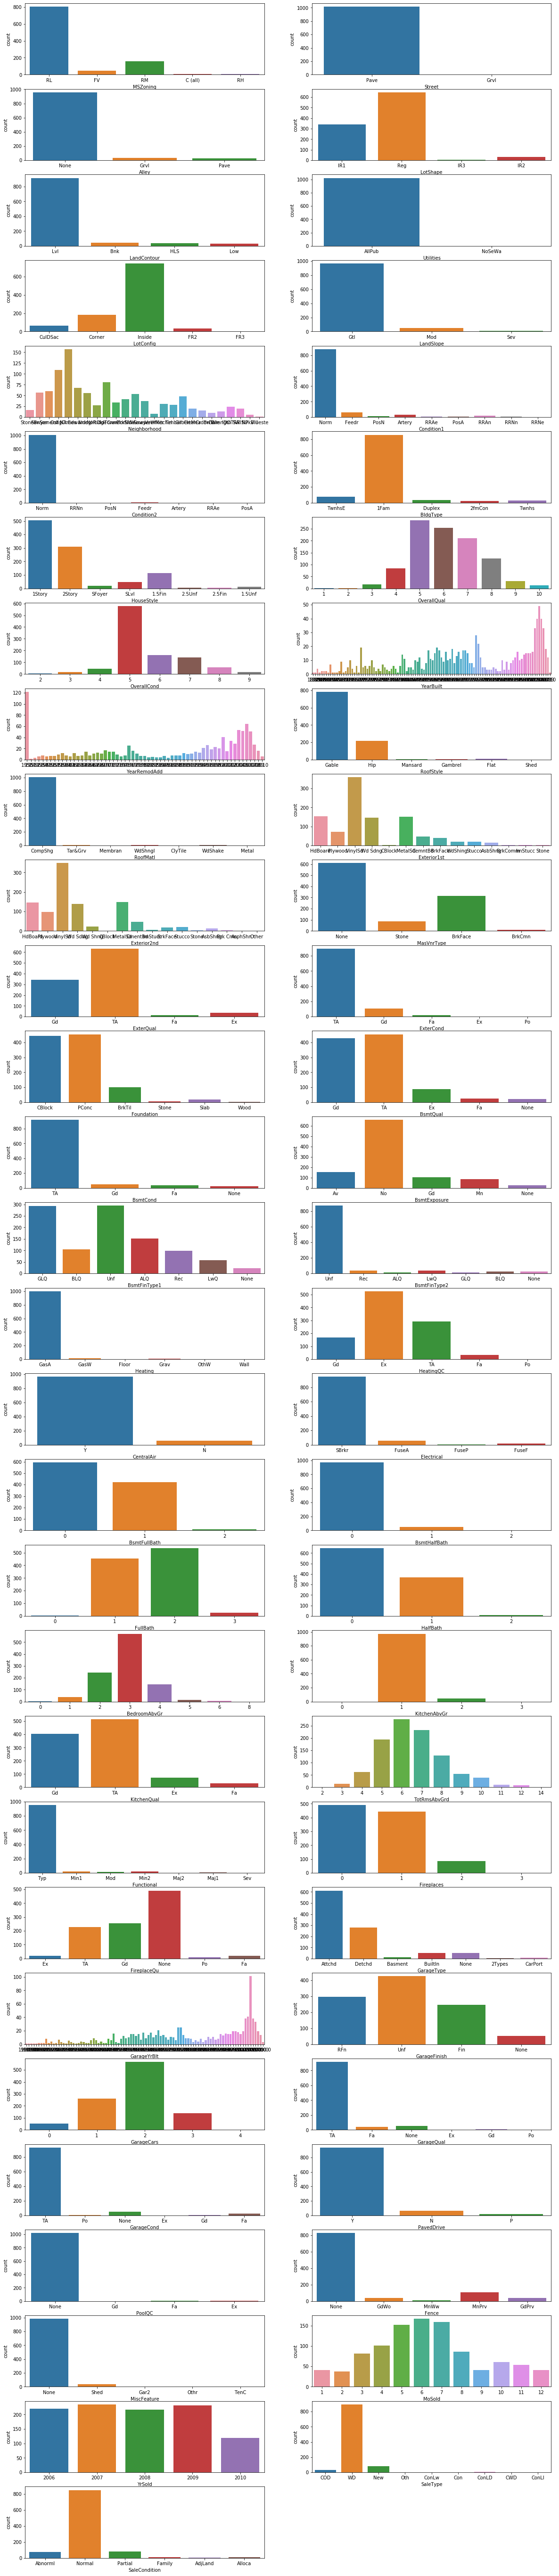

In [34]:
fig = plt.figure(figsize=(20,200))

for i in range(1,len(cat_cols)):
    ax = fig.add_subplot(len(cat_cols), 2, i)
    g = sns.countplot(house_train[cat_cols[i]])
    

drop = train.isnull().sum()
drop = missing_values[missing_values>0]
drop.sort_values(inplace=True)

We will check the variance of the `categorical columns` in the `training set`

In [35]:
result = []
feature = []
for i in house_train[cat_cols].columns:
    count = house_train[i].value_counts()/len(house_train[i])*100
    count = count[count>=85]
    if not count.empty :
        result.append([i,count.to_string(header=None, index=None)])
        feature.append(i)

final_cat = pd.DataFrame(result, columns = ['Feature', 'Percentage of features'])
feature

['Street',
 'Alley',
 'LandContour',
 'Utilities',
 'LandSlope',
 'Condition1',
 'Condition2',
 'RoofMatl',
 'ExterCond',
 'BsmtCond',
 'BsmtFinType2',
 'Heating',
 'CentralAir',
 'Electrical',
 'BsmtHalfBath',
 'KitchenAbvGr',
 'Functional',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'MiscFeature',
 'SaleType']

In [36]:
final_cat

,Feature,Percentage of features
0,Street,99.412916
1,Alley,93.639922
2,LandContour,89.726027
3,Utilities,99.902153
4,LandSlope,94.227006
5,Condition1,85.812133
6,Condition2,98.825832
7,RoofMatl,98.238748
8,ExterCond,87.475538
9,BsmtCond,89.921722


The following feaures either have zero variance or 1 very dominant category
`Street`, `Alley`, `LandContour`, `Utilities`, `LandSlope`, `Condition1`, `Condition2`,`RoofMatl`, `ExterCond`, `BsmtCond`, `BsmtFinType2`, `Heating`, `CentralAir`, `Electrical`, `BsmtHalfBath`, `KitchenAbvGr`, `Functional`, `GarageQual`, `GarageCond`, `PavedDrive`, `PoolQC`, `MiscFeature`, `SaleType`

Hence, we would drop them in further steps

In [37]:
zerovar_cat_cols = ['Street', 'Alley', 'LandContour', 'Utilities', 'LandSlope', 'Condition1', 'Condition2',
                    'RoofMatl','ExterCond', 'BsmtCond', 'BsmtFinType2', 'Heating', 'CentralAir',
                    'Electrical', 'BsmtHalfBath', 'KitchenAbvGr', 'Functional', 'GarageQual', 'GarageCond',
                    'PavedDrive', 'PoolQC', 'MiscFeature', 'SaleType']

<div class="alert alert-block alert-info"><b> 

 - In the further steps, we could create a function where we can drop both `categorical columns` and the `numerical columns`

</b></div>

In [38]:
house_train[cat_cols].astype('category').describe()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition
count,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022.0,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022
unique,15,5,2,3,4,4,2,5,3,25,9,7,5,8,10,8,110,61,6,7,14,16,4,4,5,6,5,4,5,7,7,6,5,2,4,3,3,4,3,8,4,4,12,7,4,6,7,96.0,4,5,6,6,3,4,5,5,12,5,9,6
top,20,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,2005,1950,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,0,0,2,0,3,1,TA,6,Typ,0,None,Attchd,2005.0,Unf,2,TA,TA,Y,None,None,None,6,2007,WD,Normal
freq,377,803,1016,957,645,917,1021,741,963,157,877,1010,856,504,285,578,49,122,784,1004,359,349,610,633,894,454,455,919,657,295,874,1002,526,963,946,594,969,536,647,571,973,514,276,954,491,491,612,101.0,426,567,916,931,937,1017,827,983,167,235,894,848


### Visualization of `num_cols`

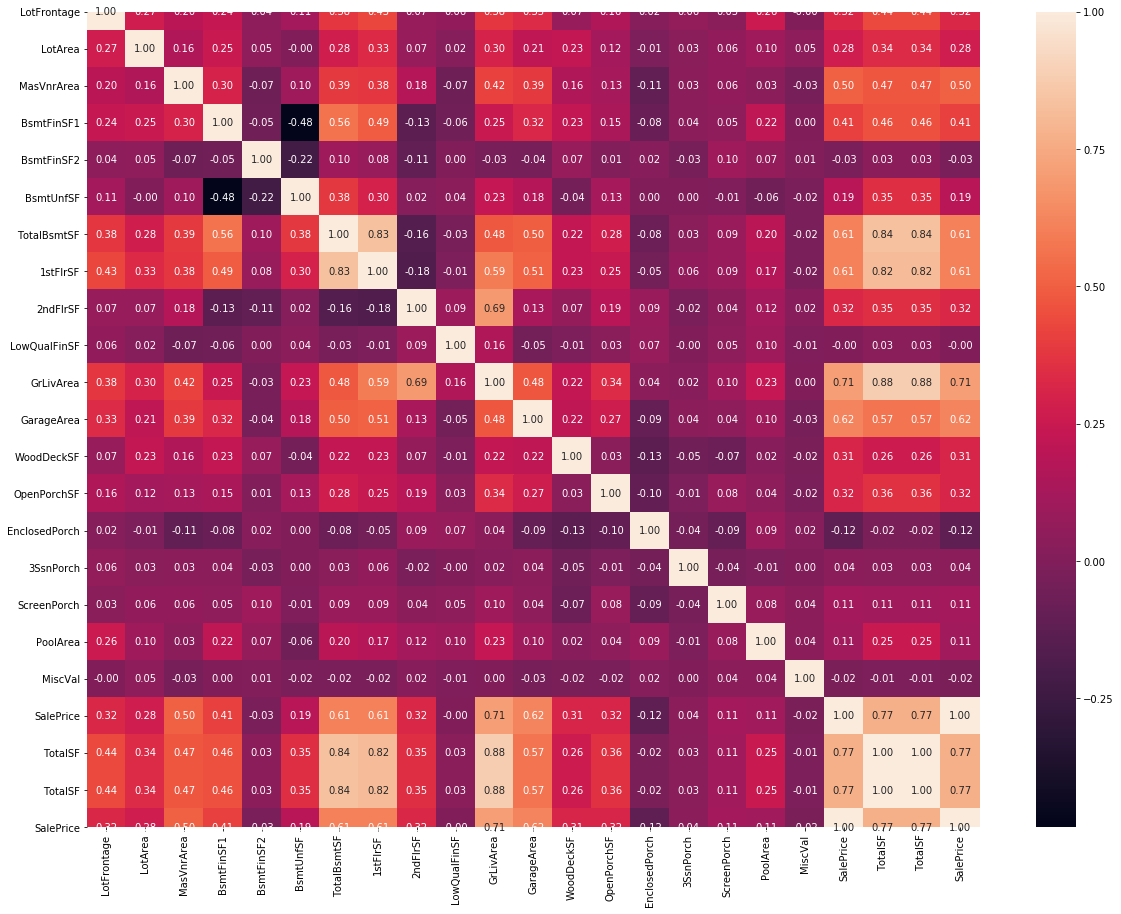

In [39]:
num_cols.append('SalePrice')
corr_plot(house_train[num_cols])

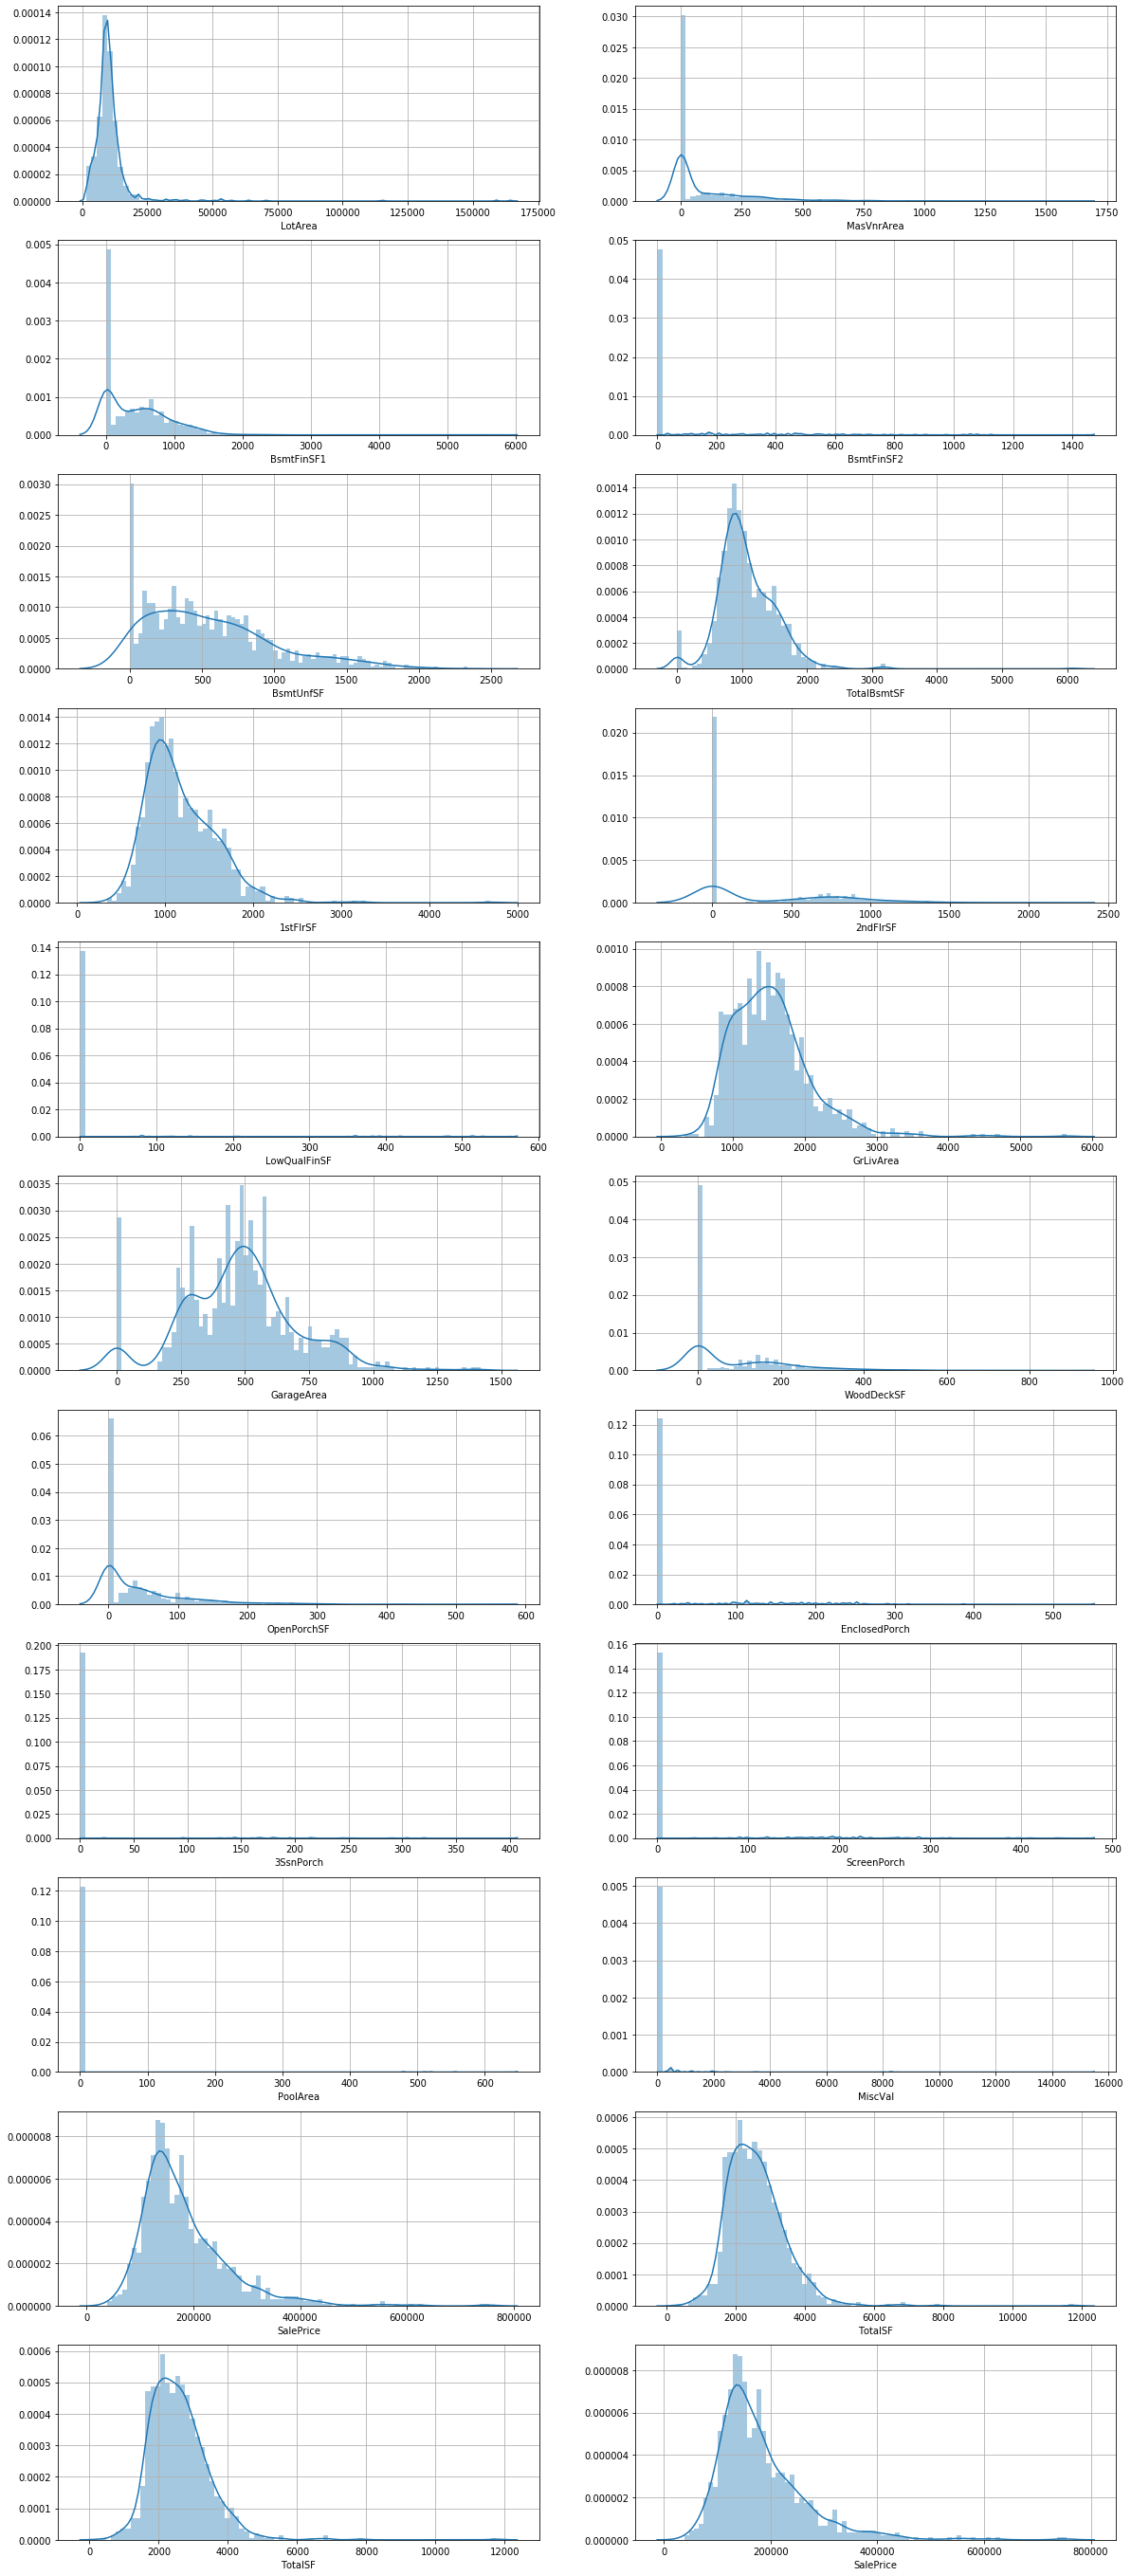

In [40]:
fig = plt.figure(figsize=(20,90))

for i in range(1,len(num_cols)):
    ax = fig.add_subplot(20, 2, i)
    g = sns.distplot(house_train[num_cols[i]], bins=80)
    plt.grid(True)
    

In [41]:
result = []
for i in train[num_cols].columns:
    count = train[i].value_counts()/len(train[i])*100
    count = count[count>=85]
    if not count.empty :
#         count.to_string(header=None, index=None)1
        result.append([i,count.to_string(header=None, index=None)])

final_num = pd.DataFrame(result, columns = ['Feature', 'Percentage of features'])

In [42]:
final_num

,Feature,Percentage of features
0,BsmtFinSF2,88.561644
1,LowQualFinSF,98.219178
2,EnclosedPorch,85.753425
3,3SsnPorch,98.356164
4,ScreenPorch,92.054795
5,PoolArea,99.520548
6,MiscVal,96.438356


We decide to **DROP** the features which have frequency of categories greater than or equal to 85%

The features are `BsmtFinSF2`, `LowQualFinSF`, `EnclosedPorch`, `3SsnPorch`, `ScreenPorch`, `PoolArea`, `MiscVal` which have nearly 0 variance

Also, there features have very less correlcation (less than 0.2) with the target variables `SalePrice`


In [43]:
zerovar_num_cols = ['BsmtFinSF2', 'LowQualFinSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 
                    'PoolArea','MiscVal']


Defining a function to drop features and make a list

In [44]:
house_train[num_cols].describe()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,TotalSF,TotalSF,SalePrice
count,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000
mean,69.970646,10628.524462,106.854207,457.642857,49.603718,564.384540,1071.631115,1171.119374,349.924658,5.817025,1526.861057,481.653620,96.005871,47.970646,23.021526,3.991194,16.108611,2.655577,54.690802,182552.379648,2592.675147,2592.675147,182552.379648
std,23.014434,9660.986043,189.408258,476.190635,166.553073,440.724752,452.499349,397.256181,438.328312,48.960665,542.925761,219.314856,128.942842,68.346335,63.529671,29.962349,58.982301,38.106850,589.505867,82858.611895,855.294863,855.294863,82858.611895
min,21.000000,1491.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,39300.000000,334.000000,334.000000,39300.000000
25%,60.000000,7646.000000,0.000000,0.000000,0.000000,220.250000,800.750000,892.250000,0.000000,0.000000,1130.250000,336.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129000.000000,2008.000000,2008.000000,129000.000000
50%,69.000000,9540.000000,0.000000,387.000000,0.000000,484.000000,992.000000,1087.000000,0.000000,0.000000,1474.500000,480.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,162000.000000,2491.500000,2491.500000,162000.000000
75%,79.000000,11613.500000,166.000000,737.750000,0.000000,805.500000,1324.000000,1406.500000,728.750000,0.000000,1786.000000,581.000000,168.000000,69.750000,0.000000,0.000000,0.000000,0.000000,0.000000,216627.750000,3035.750000,3035.750000,216627.750000
max,313.000000,164660.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,1418.000000,857.000000,547.000000,552.000000,407.000000,480.000000,648.000000,15500.000000,755000.000000,11752.000000,11752.000000,755000.000000


In [45]:
# fig = plt.figure(figsize=(20,100))

# for i in range(1,len(num_cols)):
#     ax = fig.add_subplot(20, 2, i)
#     g = sns.regplot(house_train[num_cols[i]], y = house_train['SalePrice'])
#     plt.grid(True)
    


<div class="alert alert-block alert-info"><b> 

 - The `LotArea` has some data instances where the area is large but thesubsequent SalePrice is low. This is leveraging the regression line and hence we would drop this data instances 

</b></div>

In [46]:
print('Number of observations above 56000 = ', house_train[house_train.LotArea > 56000].shape[0])
df = house_train[house_train.LotArea < 56000]

Number of observations above 56000 =  6


In [47]:
df['LotArea'].count()

1016

### Function to drop the features

In [48]:
dropped_features = []

def update_cols(col_list):
        
    print('Before Drop : \n# of Numeric Features : ', len(num_cols), 
          '\n# of Categorical Features : ', len(cat_cols),
          '\n# of Total Features : ', len(num_cols) + len(cat_cols))

    house_train.drop(col_list, axis = 1, inplace = True)
    house_test.drop(col_list, axis = 1, inplace = True)
    dropped_features.append(col_list)

    for col in col_list :
        if col in num_cols :
            num_cols.remove(col)
        elif col in cat_cols :
            cat_cols.remove(col)

    print('\nAfter Drop : \n# of Numeric Features : ', len(num_cols), 
          '\n# of Categorical Features : ', len(cat_cols),
          '\n# of Total Features : ', len(num_cols) + len(cat_cols))

In [49]:
update_cols(zerovar_cat_cols)

Before Drop : 
# of Numeric Features :  23 
# of Categorical Features :  60 
# of Total Features :  83

After Drop : 
# of Numeric Features :  23 
# of Categorical Features :  37 
# of Total Features :  60


In [50]:
update_cols(zerovar_num_cols)

Before Drop : 
# of Numeric Features :  23 
# of Categorical Features :  37 
# of Total Features :  60

After Drop : 
# of Numeric Features :  16 
# of Categorical Features :  37 
# of Total Features :  53


----

#### We are ready with our processed data. The last thing we do is to: 
    - `OneHotEncode` the `categorical features`
    - `Standardize` the `numerical  features`

Before we OneHotEncode, we first need to convert the categorical features into `category` in the `train` and `test` dataset

In [51]:
X_train = house_train.drop('SalePrice', axis = 1) #, inplace = True)
y_train = house_train['SalePrice']

X_test = house_test.drop('SalePrice', axis = 1) #, inplace = True)
y_test = house_test['SalePrice']


In [52]:
X_train[cat_cols] = X_train[cat_cols].astype('category')
X_test[cat_cols] = X_test[cat_cols].astype('category')

In [53]:
X_train[cat_cols].describe()

,MSSubClass,MSZoning,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,Fence,MoSold,YrSold,SaleCondition
count,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022.0,1022,1022,1022,1022,1022,1022
unique,15,5,4,5,25,5,8,10,8,110,61,6,14,16,4,4,6,5,5,7,5,3,4,3,8,4,12,4,6,7,96.0,4,5,5,12,5,6
top,20,RL,Reg,Inside,NAmes,1Fam,1Story,5,5,2005,1950,Gable,VinylSd,VinylSd,None,TA,PConc,TA,No,Unf,Ex,0,2,0,3,TA,6,0,None,Attchd,2005.0,Unf,2,None,6,2007,Normal
freq,377,803,645,741,157,856,504,285,578,49,122,784,359,349,610,633,454,455,657,295,526,594,536,647,571,514,276,491,491,612,101.0,426,567,827,167,235,848


In [54]:
X_test[cat_cols].describe()

,MSSubClass,MSZoning,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,Fence,MoSold,YrSold,SaleCondition
count,438,438,438,438,438,438,438,438,438,438,438,438,438,438,438,438,438,438,438,438,438,438,438,438,438,438,438,438,438,438,438.0,438,438,438,438,438,438
unique,15,5,4,4,25,5,8,10,9,94,60,6,12,14,4,4,4,5,5,7,4,4,4,3,7,4,10,4,6,6,84.0,4,5,5,12,5,6
top,20,RL,Reg,Inside,NAmes,1Fam,1Story,6,5,2006,1950,Gable,VinylSd,VinylSd,None,TA,PConc,TA,No,Unf,Ex,0,2,0,3,TA,6,1,None,Attchd,2005.0,Unf,2,None,6,2009,Normal
freq,159,348,280,311,68,364,222,120,243,27,56,357,156,155,262,273,193,194,296,135,215,262,232,266,233,221,126,206,199,258,45.0,179,257,352,86,107,350


In [55]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown = 'ignore')

X_train = ohe.fit_transform(X_train[cat_cols])
X_test = ohe.transform(X_test[cat_cols])

In [56]:
X_train.shape

(1022, 512)

In [57]:
X_test.shape

(438, 512)

### Standardizing the `numerical features`

In [58]:
from sklearn.preprocessing import StandardScaler
SC = StandardScaler(with_mean=False)

SC.fit(X_train)
X_train_SC = SC.transform(X_train)
X_test_SC = SC.transform(X_test)

# Model Building

In [59]:
# Model evaluation metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error


___

# Building different models

## Standardized Models

#### Linear Regression

,predicted,actual
Id,,
606,45345.53,205000.0
643,172505.62,345000.0
994,155213.90,173900.0
737,-41557.44,93500.0
1240,232929.85,265900.0
436,237447.80,212000.0
685,271679.67,221000.0
1136,99389.22,102000.0
273,353693.74,290000.0


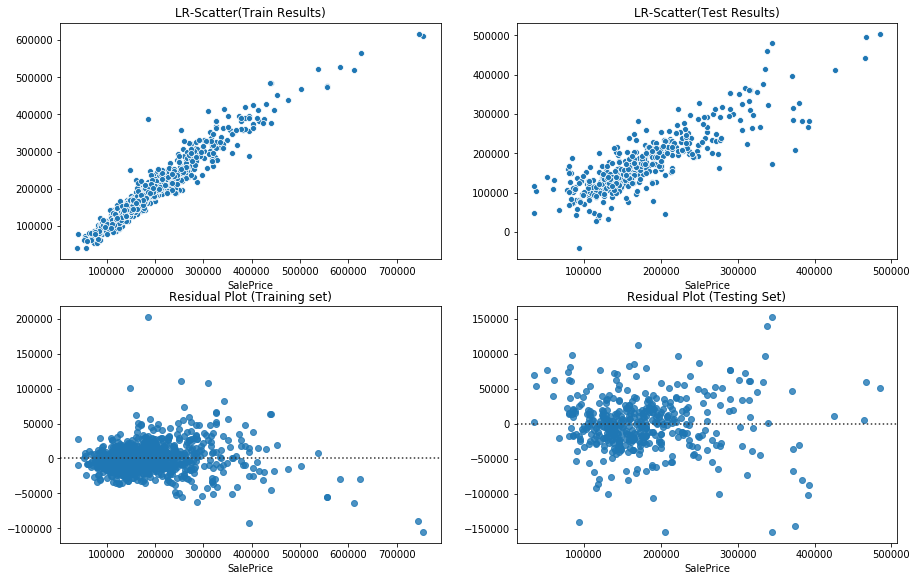

In [60]:
from sklearn.linear_model import LinearRegression
slr_SC = LinearRegression()
slr_SC.fit(X_train_SC, y_train)

pred_train_slr_SC = slr_SC.predict(X_train_SC)
pred_test_slr_SC = slr_SC.predict(X_test_SC)

LRMSE_SC = mean_squared_error(y_true = y_test, y_pred = pred_test_slr_SC)
LRMAE_SC = mean_absolute_error(y_true = y_test, y_pred = pred_test_slr_SC)
LRScores_SC = [LRMSE_SC, LRMAE_SC]

# Visualization of results
plt.figure(figsize = (15,20))
plt.subplot(421)
sns.scatterplot(x = y_train, y = pred_train_slr_SC)
plt.title('LR-Scatter(Train Results)')
plt.subplot(422)
sns.scatterplot(x = y_test, y = pred_test_slr_SC)
plt.title('LR-Scatter(Test Results)')
plt.subplot(423)
sns.residplot(x = y_train, y = pred_train_slr_SC)
plt.title('Residual Plot (Training set)')
plt.subplot(424)
sns.residplot(x = y_test, y = pred_test_slr_SC)
plt.title('Residual Plot (Testing Set)')

# Checking of predicted values 
SLR_SC_pred_actual = pd.DataFrame({'predicted': np.round(pred_test_slr_SC,2), 'actual': y_test})

SLR_SC_pred_actual.head(10)

#### Elastic Net

,predicted,actual
Id,,
606,78710.16,205000.0
643,205895.76,345000.0
994,168493.27,173900.0
737,55548.38,93500.0
1240,252646.08,265900.0
436,254689.98,212000.0
685,263163.17,221000.0
1136,107132.51,102000.0
273,326195.44,290000.0


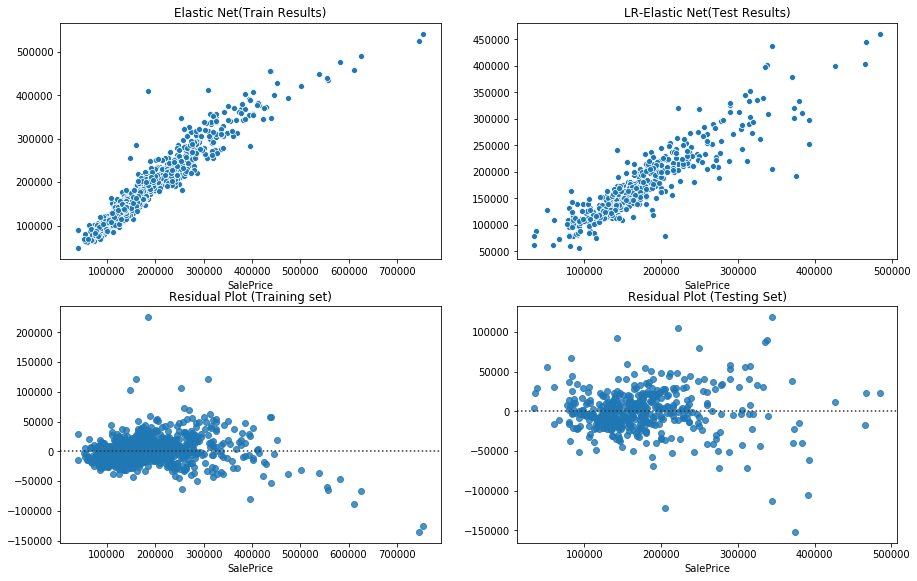

In [61]:
from sklearn.linear_model import ElasticNet

en_SC = ElasticNet()
en_SC.fit(X_train_SC, y_train)

pred_train_en_SC = en_SC.predict(X_train_SC)
pred_test_en_SC = en_SC.predict(X_test_SC)

ENMSE_SC = mean_squared_error(y_true = y_test, y_pred = pred_test_en_SC)
ENMAE_SC = mean_absolute_error(y_true = y_test, y_pred = pred_test_en_SC)
ENScores_SC = [ENMSE_SC, ENMAE_SC]

# Visualizing the plots
plt.figure(figsize = (15,20))
plt.subplot(421)
sns.scatterplot(x = y_train, y = pred_train_en_SC)
plt.title('Elastic Net(Train Results)')
plt.subplot(422)
sns.scatterplot(x = y_test, y = pred_test_en_SC)
plt.title('LR-Elastic Net(Test Results)')
plt.subplot(423)
sns.residplot(x = y_train, y = pred_train_en_SC)
plt.title('Residual Plot (Training set)')
plt.subplot(424)
sns.residplot(x = y_test, y = pred_test_en_SC)
plt.title('Residual Plot (Testing Set)')

# Checking of predicted values 
EN_SC_pred_actual = pd.DataFrame({'predicted': np.round(pred_test_en_SC,2), 'actual': y_test})

EN_SC_pred_actual.head(10)

#### K-Nearest Regression

,predicted,actual
Id,,
606,171350.0,205000.0
643,206600.0,345000.0
994,190976.0,173900.0
737,114460.0,93500.0
1240,247975.8,265900.0
436,246280.0,212000.0
685,262880.0,221000.0
1136,123080.0,102000.0
273,231600.0,290000.0


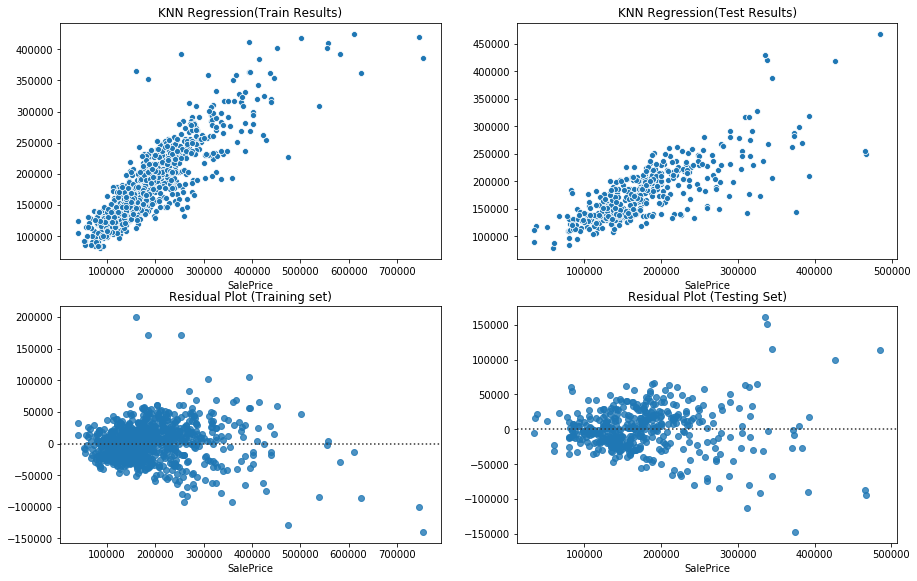

In [62]:
from sklearn.neighbors import KNeighborsRegressor

knr_SC = KNeighborsRegressor()
knr_SC.fit(X_train_SC, y_train)

pred_train_knr_SC = knr_SC.predict(X_train_SC)
pred_test_knr_SC = knr_SC.predict(X_test_SC)

KNRMSE_SC = mean_squared_error(y_true = y_test, y_pred = pred_test_knr_SC)
KNRMAE_SC = mean_absolute_error(y_true = y_test, y_pred = pred_test_knr_SC)
KNRScores_SC = [KNRMSE_SC, KNRMAE_SC]

# Visualization of plots
plt.figure(figsize = (15,20))
plt.subplot(421)
sns.scatterplot(x = y_train, y = pred_train_knr_SC)
plt.title('KNN Regression(Train Results)')
plt.subplot(422)
sns.scatterplot(x = y_test, y = pred_test_knr_SC)
plt.title('KNN Regression(Test Results)')
plt.subplot(423)
sns.residplot(x = y_train, y = pred_train_knr_SC)
plt.title('Residual Plot (Training set)')
plt.subplot(424)
sns.residplot(x = y_test, y = pred_test_knr_SC)
plt.title('Residual Plot (Testing Set)')

# Checking of the predicted values
KNR_SC_pred_actual = pd.DataFrame({'predicted': np.round(pred_test_knr_SC,2), 'actual': y_test})

KNR_SC_pred_actual.head(10)

#### Decision Tree Regression

,predicted,actual
Id,,
606,196500.0,205000.0
643,220000.0,345000.0
994,175000.0,173900.0
737,92900.0,93500.0
1240,235000.0,265900.0
436,190000.0,212000.0
685,172785.0,221000.0
1136,116900.0,102000.0
273,337000.0,290000.0


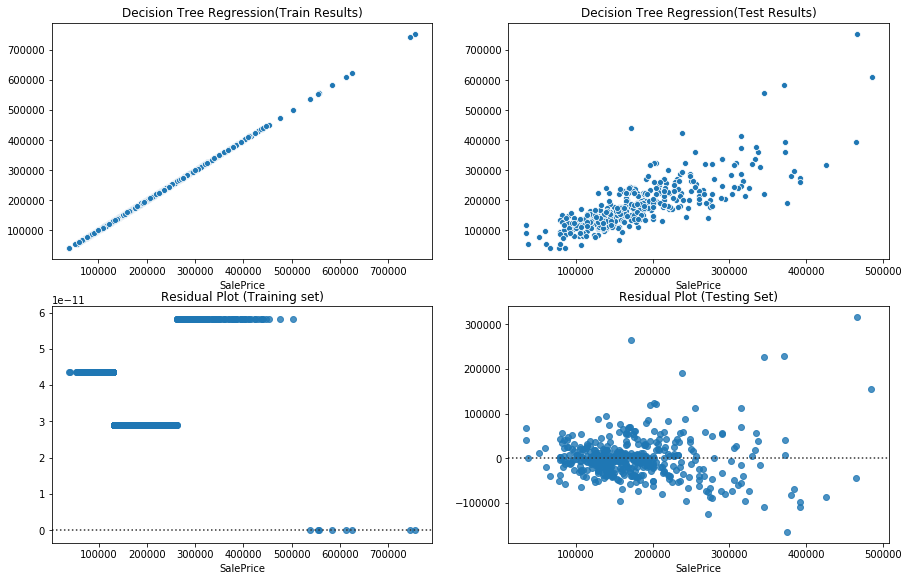

In [63]:
from sklearn.tree import DecisionTreeRegressor

dtr_SC = DecisionTreeRegressor()
dtr_SC.fit(X_train_SC, y_train)

pred_train_dtr_SC = dtr_SC.predict(X_train_SC)
pred_test_dtr_SC = dtr_SC.predict(X_test_SC)

DTRMSE_SC = mean_squared_error(y_true = y_test, y_pred = pred_test_dtr_SC)
DTRMAE_SC = mean_absolute_error(y_true = y_test, y_pred = pred_test_dtr_SC)
DTRScores_SC = [DTRMSE_SC, DTRMAE_SC]

# Visualizing the results
plt.figure(figsize = (15,20))
plt.subplot(421)
sns.scatterplot(x = y_train, y = pred_train_dtr_SC)
plt.title('Decision Tree Regression(Train Results)')
plt.subplot(422)
sns.scatterplot(x = y_test, y = pred_test_dtr_SC)
plt.title('Decision Tree Regression(Test Results)')
plt.subplot(423)
sns.residplot(x = y_train, y = pred_train_dtr_SC)
plt.title('Residual Plot (Training set)')
plt.subplot(424)
sns.residplot(x = y_test, y = pred_test_dtr_SC)
plt.title('Residual Plot (Testing Set)')

# Checking the predicted values
DTR_pred_actual = pd.DataFrame({'predicted': np.round(pred_test_dtr_SC,2), 'actual': y_test})

DTR_pred_actual.head(10)

____

## Non-Standardized Models

#### Linear Regression

,predicted,actual
Id,,
606,45345.84,205000.0
643,172505.83,345000.0
994,155213.86,173900.0
737,-41558.34,93500.0
1240,232929.91,265900.0
436,237447.80,212000.0
685,271679.63,221000.0
1136,99389.31,102000.0
273,353693.86,290000.0


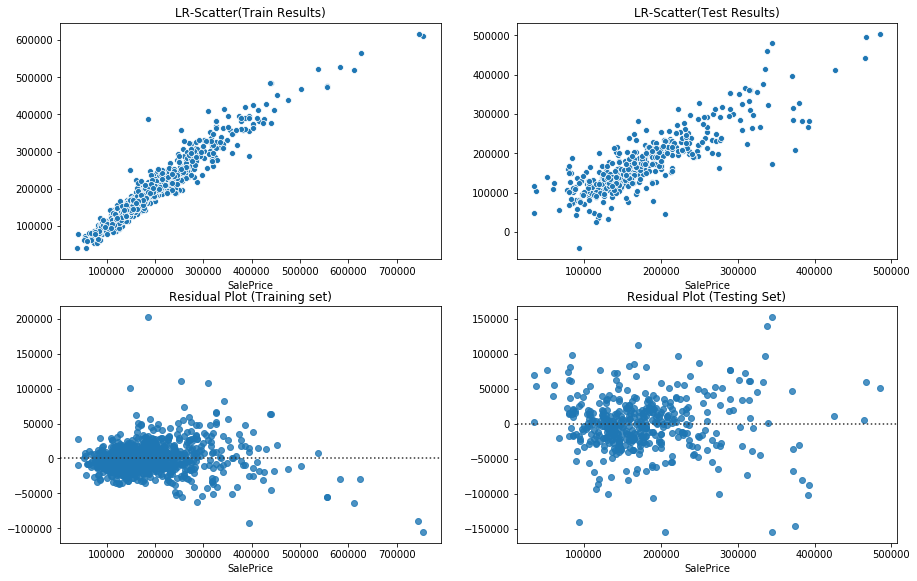

In [64]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(X_train, y_train)

pred_train_slr = slr.predict(X_train)
pred_test_slr = slr.predict(X_test)

LRMSE = mean_squared_error(y_true = y_test, y_pred = pred_test_slr)
LRMAE = mean_absolute_error(y_true = y_test, y_pred = pred_test_slr)
LRScores = [LRMSE, LRMAE]

# Visualization of results
plt.figure(figsize = (15,20))
plt.subplot(421)
sns.scatterplot(x = y_train, y = pred_train_slr)
plt.title('LR-Scatter(Train Results)')
plt.subplot(422)
sns.scatterplot(x = y_test, y = pred_test_slr)
plt.title('LR-Scatter(Test Results)')
plt.subplot(423)
sns.residplot(x = y_train, y = pred_train_slr)
plt.title('Residual Plot (Training set)')
plt.subplot(424)
sns.residplot(x = y_test, y = pred_test_slr)
plt.title('Residual Plot (Testing Set)')

# Checking of predicted values 
SLR_pred_actual = pd.DataFrame({'predicted': np.round(pred_test_slr,2), 'actual': y_test})

SLR_pred_actual.head(10)

#### Elastic Net

,predicted,actual
Id,,
606,163285.30,205000.0
643,244396.86,345000.0
994,182073.03,173900.0
737,116994.40,93500.0
1240,259253.83,265900.0
436,246145.65,212000.0
685,215527.25,221000.0
1136,120746.83,102000.0
273,288077.20,290000.0


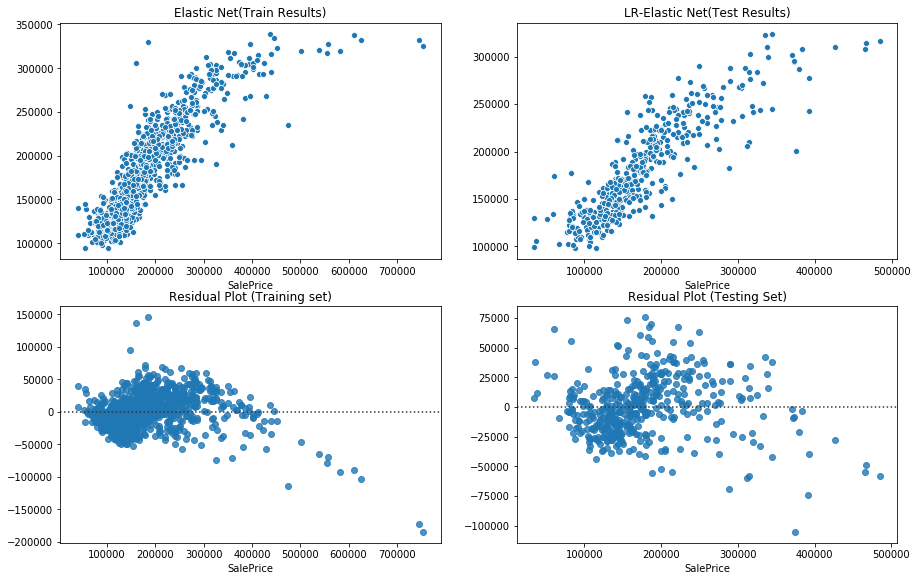

In [65]:
from sklearn.linear_model import ElasticNet

en = ElasticNet()
en.fit(X_train, y_train)

pred_train_en = en.predict(X_train)
pred_test_en = en.predict(X_test)

ENMSE = mean_squared_error(y_true = y_test, y_pred = pred_test_en)
ENMAE = mean_absolute_error(y_true = y_test, y_pred = pred_test_en)
ENScores = [ENMSE, ENMAE]

# Visualizing the plots
plt.figure(figsize = (15,20))
plt.subplot(421)
sns.scatterplot(x = y_train, y = pred_train_en)
plt.title('Elastic Net(Train Results)')
plt.subplot(422)
sns.scatterplot(x = y_test, y = pred_test_en)
plt.title('LR-Elastic Net(Test Results)')
plt.subplot(423)
sns.residplot(x = y_train, y = pred_train_en)
plt.title('Residual Plot (Training set)')
plt.subplot(424)
sns.residplot(x = y_test, y = pred_test_en)
plt.title('Residual Plot (Testing Set)')

# Checking of predicted values 
EN_SC_pred_actual = pd.DataFrame({'predicted': np.round(pred_test_en,2), 'actual': y_test})

EN_SC_pred_actual.head(10)

### K-Nearest Regression

,predicted,actual
Id,,
606,171300.0,205000.0
643,288220.0,345000.0
994,192657.8,173900.0
737,103030.6,93500.0
1240,247975.8,265900.0
436,234960.0,212000.0
685,234860.0,221000.0
1136,114980.0,102000.0
273,308400.0,290000.0


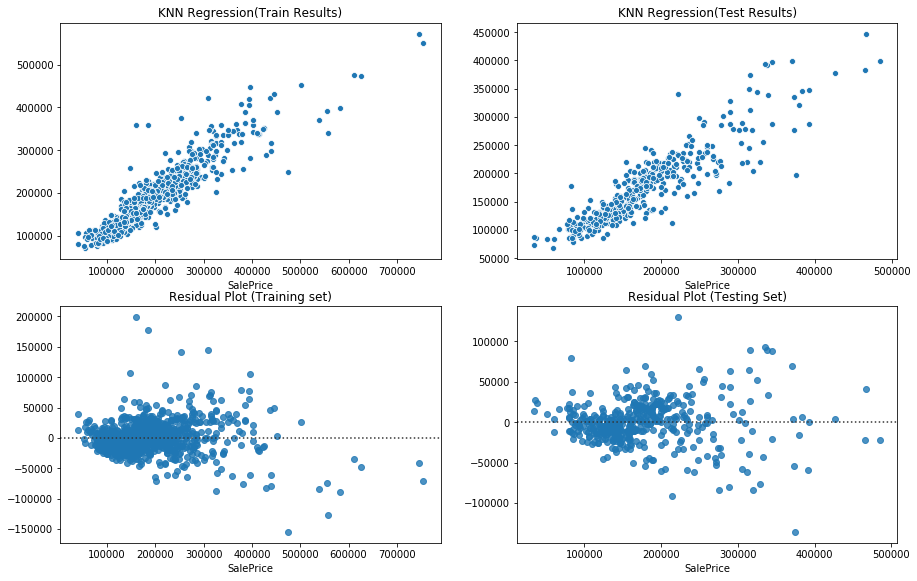

In [66]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()
knr.fit(X_train, y_train)

pred_train_knr = knr.predict(X_train)
pred_test_knr = knr.predict(X_test)

KNRMSE = mean_squared_error(y_true = y_test, y_pred = pred_test_knr)
KNRMAE = mean_absolute_error(y_true = y_test, y_pred = pred_test_knr)
KNRScores = [KNRMSE, KNRMAE]

# Visualization of plots
plt.figure(figsize = (15,20))
plt.subplot(421)
sns.scatterplot(x = y_train, y = pred_train_knr)
plt.title('KNN Regression(Train Results)')
plt.subplot(422)
sns.scatterplot(x = y_test, y = pred_test_knr)
plt.title('KNN Regression(Test Results)')
plt.subplot(423)
sns.residplot(x = y_train, y = pred_train_knr)
plt.title('Residual Plot (Training set)')
plt.subplot(424)
sns.residplot(x = y_test, y = pred_test_knr)
plt.title('Residual Plot (Testing Set)')

# Checking of the predicted values
KNR_pred_actual = pd.DataFrame({'predicted': np.round(pred_test_knr,2), 'actual': y_test})

KNR_pred_actual.head(10)

#### Decision Tree Regression

,predicted,actual
Id,,
606,196500.0,205000.0
643,220000.0,345000.0
994,174000.0,173900.0
737,82000.0,93500.0
1240,240000.0,265900.0
436,189000.0,212000.0
685,176485.0,221000.0
1136,116900.0,102000.0
273,337000.0,290000.0


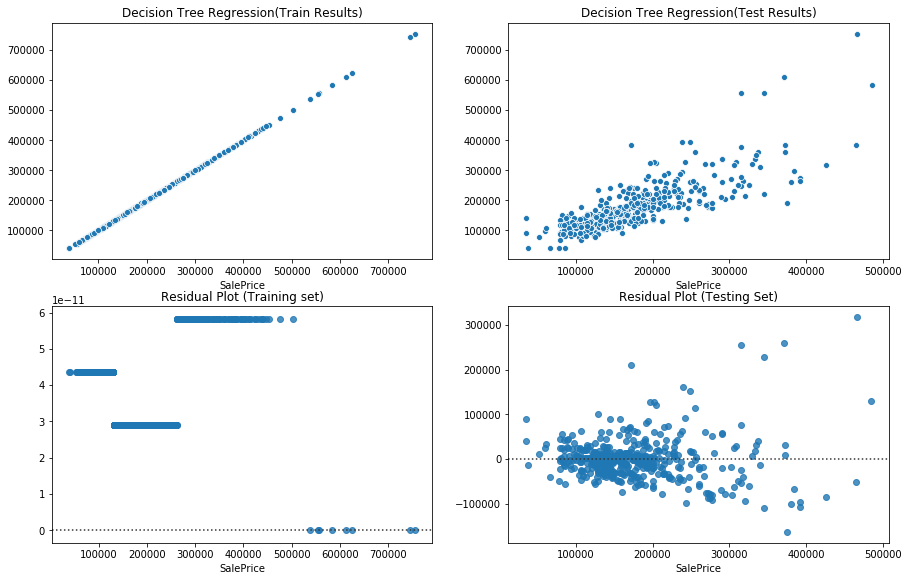

In [67]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

pred_train_dtr = dtr.predict(X_train)
pred_test_dtr = dtr.predict(X_test)

DTRMSE = mean_squared_error(y_true = y_test, y_pred = pred_test_dtr)
DTRMAE = mean_absolute_error(y_true = y_test, y_pred = pred_test_dtr)
DTRScores = [DTRMSE, DTRMAE]

# Visualizing the results
plt.figure(figsize = (15,20))
plt.subplot(421)
sns.scatterplot(x = y_train, y = pred_train_dtr)
plt.title('Decision Tree Regression(Train Results)')
plt.subplot(422)
sns.scatterplot(x = y_test, y = pred_test_dtr)
plt.title('Decision Tree Regression(Test Results)')
plt.subplot(423)
sns.residplot(x = y_train, y = pred_train_dtr)
plt.title('Residual Plot (Training set)')
plt.subplot(424)
sns.residplot(x = y_test, y = pred_test_dtr)
plt.title('Residual Plot (Testing Set)')

# Checking the predicted values
DTR_pred_actual = pd.DataFrame({'predicted': np.round(pred_test_dtr,2), 'actual': y_test})

DTR_pred_actual.head(10)

## Reports of the above model building

### Standardized Models

In [68]:
std_model = pd.DataFrame([LRScores_SC,ENScores_SC,KNRScores_SC, DTRScores_SC], columns = ['MSE', 'MAE'], 
                         index = ['Linear', 'Elastic Net', 'KNR','DTR'])
std_model['RMSE'] = std_model['MSE'].apply(lambda x: x**(1/2))
std_model

,MSE,MAE,RMSE
Linear,1.600664e+09,29081.683514,40008.294262
Elastic Net,9.162980e+08,21164.003931,30270.414651
KNR,1.972567e+09,30725.259817,44413.590457
DTR,2.320958e+09,32309.481735,48176.325600


### Non-Standardized Models

In [69]:
non_std_model = pd.DataFrame([LRScores, ENScores,KNRScores, DTRScores], columns = ['MSE', 'MAE'], 
                             index = ['Linear', 'Elastic Net', 'KNR', 'DTR'])
non_std_model['RMSE'] = non_std_model['MSE'].apply(lambda x: x**(1/2))
non_std_model

,MSE,MAE,RMSE
Linear,1.598434e+09,29060.150405,39980.419467
Elastic Net,1.335863e+09,25334.037416,36549.460642
KNR,9.768653e+08,21368.118721,31254.843713
DTR,2.415417e+09,32625.404110,49146.888146


____